<h2>Introduction to the Logistic Regression Model </h2>

<p>Logistic regression is a statistical model which is used to predict outcomes by learning insights from a labelled
dataset.</p> 

<p>The model leverages the backpropagation algorithm to optimize its 
parameters used for prediction from a labeled dataset. This is known as the supervised 
learning.</p> 

<p>Logistic regression has many applications in industries such as:</p> 

<ul>
    <li>Marketing</li>
    <li>Human Resources</li>
    <li>Finance</li>
    
</ul>


<p>The following Notebook outlines the process of building a Logistic regression model to solve a binary classification problem.  Specifically, the model will be trained using a labelled dataset, and evaluating its performance on a test set</p>

In [6]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from mpl_toolkits import mplot3d


class DataProcessor:
    
    """
    	Class for reading, preprocessing raw data, and splitting into train and test set.

    	-----------------------------------------------------------
    	Attributes:
    		self.data:		  DataFrame object.  The original raw dataset
            
    		self.X:		  Input vector X (input features)
            
    		self.y:		  Output vector y (classes)

    	-----------------------------------------------------------
    	Functions:
    		__init__:		Initializes DataProcessor object.  Reads, preprocesses raw data

    		datasets:		returns train and test set (20% split).

    """
    def __init__(self):
        #read in dataset
        data = pd.read_csv("data.csv")
        #data cleaning
        y = np.asarray([0 if i==-1 else i for i in data.values[:,0]])
        data['Y']= y
        self.data=data.iloc[:,1:]
        #separate X and y
        self.X= self.data.values[:,0:2]
        self.y= self.data.values[:,2]
        
    
    def datasets(self):
        #split dataset into train and test
        return train_test_split(self.X, self.y, test_size=0.2, random_state=42)

data= DataProcessor()
X_train, X_test, y_train, y_test= data.datasets()

In [7]:
#shape of input
X_train.shape

(80, 2)

In [8]:
#shape of output
y_train.shape

(80,)

<h2> Linearly Separable dataset </h2>

<p>The advantages of Logistic Regression include:</p>
<ul>
    <li> performs well when the dataset is <strong>linearly separable</strong> </li>
    <li> very efficient to train due to limited number of parameters</li>
</ul>

<p>The disadvantages of Logistic Regression include:</p>
<ul>
    <li>data is rarely linearly separable in the real world</li>
    <li>If the number of observations are less than the number of features, an overfit may take place, leading to poor generalization </li>
    
</ul>

<p>A dataset is considered to be <strong>linearly seperable</strong> if a straight line is able to separable the different classes that the input space belongs to.  The following cell outlines the linearly separable nature of the dataset </p>

In [9]:
#Linearly separable dataset
import matplotlib.pyplot as plt

c1=np.array([j for i,j in enumerate(data.X) if data.y[i]==0])
x1_c1=c1[:,0]
x2_c1=c1[:,1]

c2= np.array([j for i,j in enumerate(data.X) if data.y[i]==1])
x1_c2=c2[:,0]
x2_c2=c2[:,1]


plt.figure(1)
plt.title("Linear Nature of Data")
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x1_c1,x2_c1,color='b', label="C1")
plt.scatter(x1_c2,x2_c2,color='r', label='C2')
plt.legend()



<h2>Logistic Regression Class </h2>

<p>In the LogisticRegression class, parameters for the logistic regression model are initialized. These parameters include:</p>

<ul>
    <li>alpha (used to update weights) </li>
    <li>epochs (number of times the model is trained on the entire dataset)</li>
    <li>weights and bias (theta)</li>

</ul>

<h3>Training the model</h3>

<p>In the train function, train set is split into validation sets, and empty lists are 
initialized so errors can be gathered.</p>

<p>
    The equation for calculating the predicted value is yhat = S(w1x1 + w2x2 + b) -> where w's are the weights, b is the bias and S is the sigmoid activation function.</p> 
    
<p>Derivatives with respect to weight 1, weight 2, and b are computed in order to update the weights and bias to ensure the total error of the network is at a minimum.</p>


<h3>Evaluating the model</h3>
    
<p>In the evaluate function, the equation yhat = S(w1x1 + w2x2 + b) is applied to the test data. These values are then rounded to be 1 or 0. Then a counter is used to compute the accuracy of the model on the test set.</p>

In [30]:
#sigmoid activation for binary classification problem
def sigmoid(x): 
    return 1.0/(1 + np.exp(-x))

#loss function used for optimization
def squared_error(y,y_hat):
    return np.square(y-y_hat)/2

#Logitic Regression model class
class LogisticRegression:
    """
    Class for building, training and evaluating the Logistic Regression model.

    -----------------------------------------------------------
    Important Attributes:
        self.weights:		  Parameters of the model that are optimized to make correct predictions on input

        self.avg_train_error:		  List containing average mean squared error per epoch

        self.epochs:          Number of times entire dataset is processed during trainin

    -----------------------------------------------------------
    Functions:
        __init__:		Initializes Logistic Regression model with randomly assigned weights, and other hyper parameres.

        train:		Takes in train set, and uses backpropagation algorithm to optimize loss function and update weights

        evaluate:		Evaluates model on test set, returning accuracy of model as decimal value

        epoch_error:		shows plot of average train and validation error per epoch

        prediction_plot:		shows plot model class prediction on test set

    """
        
    def __init__(self):
        #initialize Logitic Regression parameters and training parameters
        self.alpha= 0.01
        self.epochs=30 #change accordingly

        self.weights= np.array([random.uniform(-1,1),random.uniform(-1,1)])
        self.theta= random.uniform(-1,1)
        self.isTrained=False
        
    
    def train(self, X, y):
        
        #split train set into validation set
        self.X_train, X_valid, self.y_train, y_valid=train_test_split(X, y, test_size=0.2, random_state=42)
        
        self.error=[]
        self.avg_train_error=[]
        self.avg_valid_error=[]

        #for each epoch, execute training steps
        for i in range(self.epochs): 
            
            for x,y in zip(self.X_train,self.y_train):

                #calculate error for each example
                z= np.dot(x,self.weights) + self.theta
                output= sigmoid(z)
                self.error.append(squared_error(y,output))

                #calculate derivatives
                dw1= -(y-output)*(sigmoid(z)*(1-sigmoid(z)))*x[0]
                dw2=  -(y-output)*(sigmoid(z)*(1-sigmoid(z)))*x[1]
                dtheta=  -(y-output)*(sigmoid(z)*(1-sigmoid(z)))

                #update weights
                self.weights[0]= self.weights[0]-self.alpha*dw1
                self.weights[1]= self.weights[1]-self.alpha*dw2
                self.theta= self.theta-self.alpha*dtheta
            
            #store average train error per epoch
            self.avg_train_error.append(np.average(self.error))
            
            
            self.error=[]

            for x,y in zip(X_valid,y_valid):

                #calculate for each example in validation set
                z= np.dot(x,self.weights) + self.theta
                output= sigmoid(z)
                self.error.append(squared_error(y,output))
            
            #store average validation error
            self.avg_valid_error.append(np.average(self.error))
            self.error=[]
            
        self.isTrained=True
            
    
    def evaluate(self, X_test,y_test):
        self.X_test= X_test
        self.y_test=y_test
        if(self.isTrained):
            #compute rounded predictions from model
            z= np.dot(X_test,self.weights) + self.theta
            output= sigmoid(z) 
            self.scores= np.round(output)
            
            #check how many algorithm got correct
            counter=0
            for yhat,y in zip(self.scores,y_test):
                if(yhat==y):
                    counter+=1
            #returns accuracy on the test set
            return counter/len(y_test)
        else:
            return
    
    
    def epoch_error(self):
        if self.isTrained:
            #plot average training and validation error per epoch
            plt.figure(1)
            plt.plot(range(self.epochs),np.array(self.avg_train_error), color="blue", label= "Average Training Error")
            plt.plot(range(self.epochs),np.array(self.avg_valid_error), color="red", label="Average Validation Error")
            plt.legend()
            plt.title("Average Error vs. Epochs")
            plt.ylabel("Average Error")
            plt.xlabel("Epochs")
            plt.show()

        
    def prediction_plot(self):
        if self.isTrained:
            #plotting test data (x1,x2, C)
            fig= plt.figure(1)
            ax= plt.axes(projection="3d")
            ax.set_xlabel("X1")
            ax.set_ylabel("X2")
            ax.set_zlabel("Y")
            ax.set_title("Test-set Actual Plot")

            #splitting test set by input features x1,x2 and class output (1 0r 0)
            temp=pd.DataFrame(self.X_test)
            temp["y"]= self.y_test
            temp["output"]= self.scores
            temp= temp.sort_values(by=['y']) #sort may not be necessary
            test_ones=np.array([i for i in temp.values[:] if i[2]==1])
            test_ones_x1= test_ones[:,0]
            test_ones_x2= test_ones[:,1]
            test_ones_y= test_ones[:,2]

            test_zeros= np.array([i for i in temp.values[:] if i[2]==0])
            test_zeros_x1= test_zeros[:,0]
            test_zeros_x2= test_zeros[:,1]
            test_zeros_y= test_zeros[:,2]
            
            ax.scatter3D(test_ones_x1, test_ones_x2, test_ones_y,"green", label="C1");
            ax.scatter3D(test_zeros_x1, test_zeros_x2, test_zeros_y,"orange", label="C2");
            ax.legend()
            
            #plotting model's prediction on test data (x1,x2, predicted class)
            fig= plt.figure(2)
            ax= plt.axes(projection="3d")
            ax.set_xlabel("X1")
            ax.set_ylabel("X2")
            ax.set_zlabel("Yhat")
            ax.set_title("Test-set Prediction Plot")
        
            #data is split according to input features, predicted output and whether a prediction is wrong
            correct_pred=np.array([i for i in temp.values[:] if i[2]==i[3]])[:]
            correct_pred_ones=np.array([i for i in correct_pred[:] if i[2]==1])
            correct_pred_zeros=np.array([i for i in correct_pred[:] if i[2]==0])

            correct_pred_ones_x1= correct_pred_ones[:,0]
            correct_pred_ones_x2= correct_pred_ones[:,1]
            correct_pred_ones_y= correct_pred_ones[:,3]
            
            correct_pred_zeros_x1= correct_pred_zeros[:,0]
            correct_pred_zeros_x2= correct_pred_zeros[:,1]
            correct_pred_zeros_y= correct_pred_zeros[:,3]
            
            
            wrong_pred= np.array([i for i in temp.values[:] if i[2]!=i[3]])[:]
            wrong_pred_x1= wrong_pred[:,0] 
            wrong_pred_x2= wrong_pred[:,1] 
            wrong_pred_y= wrong_pred[:,3]

            ax.scatter3D(correct_pred_ones_x1, correct_pred_ones_x2,correct_pred_ones_y, "green", label="C1")
            ax.scatter3D(correct_pred_zeros_x1, correct_pred_zeros_x2, correct_pred_zeros_y, "orange", label="C2")
            ax.scatter3D(wrong_pred_x1,wrong_pred_x1, wrong_pred_y, "red", label="WRONG")
            ax.legend()
        
        

In [31]:
#train model on train set, print out evaluation result on test set
model= LogisticRegression()
model.train(X_train, y_train)
print(model.evaluate(X_test,y_test))

0.95


In [32]:
#error per epoch plots
model.epoch_error()

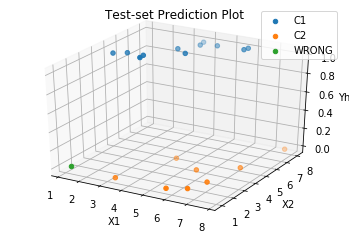

In [33]:
#model prediction on test set
model.prediction_plot()